<a href="https://colab.research.google.com/github/TariqIjaz/data-analyst/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking Analysis**

   **Context**: JPC Hotel Management is looking at ways to boost revenue for the next quarter.

   **Objective**: Analyze historical data, gather insights and make business recommedations with the specific interest in boosting revenue.


## **Insights from the Analysis**
### **1. Booking Behavior**
- **Lead Time Patterns**:
  - Customers booking far in advance (high `lead_time`) may represent planners or corporate clients. These bookings might have a higher cancellation rate due to changes in plans.
  - Last-minute bookings (low `lead_time`) could be from leisure travelers or those taking advantage of discounted deals.

- **Booking Trends by Season**:
  - Seasonal variations likely affect bookings, with higher demand during peak vacation seasons or local festivals.
  - Weekend stays might be popular for leisure travel, while weekday stays cater to corporate guests.

### **2. Cancellations**
- A significant portion of bookings might be canceled (`is_canceled` = 1).
- High cancellations might correlate with bookings made through third-party platforms or without deposits (`deposit_type` = "No Deposit").

### **3. Revenue Insights**
- Average Daily Rate (`adr`) and total revenue are driven by factors like room type (`reserved_room_type`), length of stay (`stays_in_weekend_nights` + `stays_in_week_nights`), and customer type (`customer_type`).
- Families or larger groups likely generate more revenue due to higher occupancy and add-on services (e.g., meals, special requests).

### **4. Customer Types and Loyalty**
- Customers with a high value for `previous_bookings_not_canceled` are loyal and less likely to cancel.
- Transient guests (`customer_type` = "Transient") dominate, but group bookings and corporate clients may offer higher lifetime value.

### **5. Geographic Insights**
- `country` data could show the most profitable markets for targeted marketing campaigns.

---

## **Business Recommendations**

### **A) Reduce Cancellations**
1. **Stricter Policies for High-Risk Bookings**:
   - Require deposits for bookings with long lead times.
   - Offer discounts for non-refundable bookings to secure revenue.

2. **Encourage Commitment**:
   - Provide early bird discounts for bookings with high lead times to reduce cancellations.
   - Add cancellation penalties for bookings made through third-party platforms.

---

### **B) Increase Revenue**
1. **Dynamic Pricing**:
   - Adjust `adr` based on seasonality, lead time, and occupancy rates.
   - Increase rates for premium room types and peak seasons.

2. **Upsell Services**:
   - Promote additional services such as breakfast, spa packages, and tours during the booking process.
   - Target families and groups with bundled offers.

---

### **C) Improve Customer Retention**
1. **Loyalty Programs**:
   - Offer discounts or rewards to customers with high `previous_bookings_not_canceled` values.
   - Use personalized marketing to target loyal customers.

2. **Targeted Marketing**:
   - Analyze `country` data to identify high-value markets.
   - Create marketing campaigns for regions with growth potential.

---

### **D) Optimize Booking Channels**
1. **Direct Booking Incentives**:
   - Provide perks (e.g., lower rates, free upgrades) for bookings made directly on the hotel website.
   - Reduce dependency on third-party platforms to cut commission costs.

2. **Analyze Channel Performance**:
   - Track `distribution_channel` performance to identify the most profitable and reliable channels.

---

### **E) Manage Seasonal Demand**
1. **Peak Season Strategy**:
   - Focus on maximizing revenue by prioritizing long-stay and high-paying customers.
   - Offer early bird discounts for early bookings in high-demand periods.

2. **Off-Peak Promotions**:
   - Run special offers during low-demand seasons to boost occupancy.

---

## **Conclusion**
These insights and recommendations can help the hotel management optimize revenue, reduce cancellations, and improve customer satisfaction. By leveraging the data effectively, the hotel can ensure sustained growth and profitability.




#**Data Analysis:**


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 11
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path ='/content/drive/MyDrive/hotel_bookings.csv'

df=pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
#Let's make a copy of the data. We can continue to modify the copy without affecting the original data frame.
hotel_data = df.copy()

#1. Data Cleaning & Preparation

###a) Handling Missing Values

In [7]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Check for missing values
hotel_data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [9]:
# There are 4 columns with missing values:
# 1) Children : 4 missing values
# 2) Country : 488 missing values
# 3) Agent : 16340 missing values
# 4) Company : 112593 missing values

In [10]:
# For children: Use the median value of the children column, as it is likely a numeric field and small in number.

hotel_data['children'].fillna(hotel_data['children'].median())

,children
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
119385,0.0
119386,0.0
119387,0.0
119388,0.0


In [11]:
# For country: Use the most frequent (mode) country, as it might reflect a common booking origin.

hotel_data['country'].fillna(hotel_data['country'].mode()[0])


,country
0,PRT
1,PRT
2,GBR
3,GBR
4,GBR
...,...
119385,BEL
119386,FRA
119387,DEU
119388,GBR


In [12]:
#For agent: We replace missing values with 0 to indicate unknown agents, especially if agent is represented by an ID.

hotel_data['agent'].fillna(0)

,agent
0,0.0
1,0.0
2,0.0
3,304.0
4,240.0
...,...
119385,394.0
119386,9.0
119387,9.0
119388,89.0


In [13]:
# For company: Similarly, replace missing values with 0 if company IDs represent specific businesses or affiliations.


hotel_data['company'].fillna(0)

,company
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
119385,0.0
119386,0.0
119387,0.0
119388,0.0


###b) Handling Data Type Conversion

In [14]:
#Convert dates to datetime format for time-based analysis.

hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])


hotel_data['reservation_status_date']

,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03
...,...
119385,2017-09-06
119386,2017-09-07
119387,2017-09-07
119388,2017-09-07


###c) Creating New Features for further insights


In [55]:
#Create new features for deeper insights (e.g., total nights stayed, family indicator).

hotel_data['total_nights'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']
hotel_data['is_family'] = hotel_data['adults'] + hotel_data['children'] > 2
hotel_data['total_revenue'] = hotel_data['adr'] * hotel_data['total_nights']


hotel_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,is_family,total_revenue
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,False,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,False,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,False,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,False,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,False,196.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,False,196.0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,Transient,107.0,0,0,Check-Out,2015-07-03,2,False,214.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,Transient,103.0,0,1,Check-Out,2015-07-03,2,False,206.0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,Transient,82.0,0,1,Canceled,2015-05-06,3,False,246.0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,Transient,105.5,0,0,Canceled,2015-04-22,3,False,316.5


#2) Descriptive Statistics


In [16]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_nights
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104,3.427900
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,69.000000
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN,2.557439


In [17]:
cancellation_rate = hotel_data['is_canceled'].mean()

cancellation_rate

0.37041628277075134

#3) Customer Segmentation Analysis

In [18]:
#Analyze average daily rates for different customer types (Transient, Contract, etc.).
hotel_data.groupby('customer_type')['adr'].mean()


,adr
customer_type,
Contract,87.549637
Group,83.488579
Transient,107.013621
Transient-Party,86.084253


In [57]:
# Average lead time helps assess booking behavior and inform marketing strategies.

hotel_data.groupby('customer_type')['lead_time'].mean()


,lead_time
customer_type,
Contract,142.969823
Group,55.057192
Transient,93.295515
Transient-Party,137.037056


In [60]:
#Using clustering to group customers based on booking behaviour

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Features for clustering: Corrected to use 'total_revenue'
features = hotel_data[['lead_time', 'total_revenue', 'previous_bookings_not_canceled']].dropna()

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
hotel_data.loc[features.index, 'cluster'] = kmeans.fit_predict(features_scaled)

# Display clusters with corrected column name
print(hotel_data[['lead_time', 'total_revenue', 'previous_bookings_not_canceled', 'cluster']].head())



   lead_time  total_revenue  previous_bookings_not_canceled  cluster
0        342            0.0                               0      2.0
1        737            0.0                               0      2.0
2          7           75.0                               0      0.0
3         13           75.0                               0      0.0
4         14          196.0                               0      0.0


#4) Seasonal Trend and Time-Series Analysis

In [51]:
#Identify peak booking months to optimize resource allocation.
monthly_bookings = hotel_data['arrival_date_month'].value_counts()
monthly_bookings


,count
arrival_date_month,
August,13877
July,12661
May,11791
October,11160
April,11089
June,10939
September,10508
March,9794
February,8068


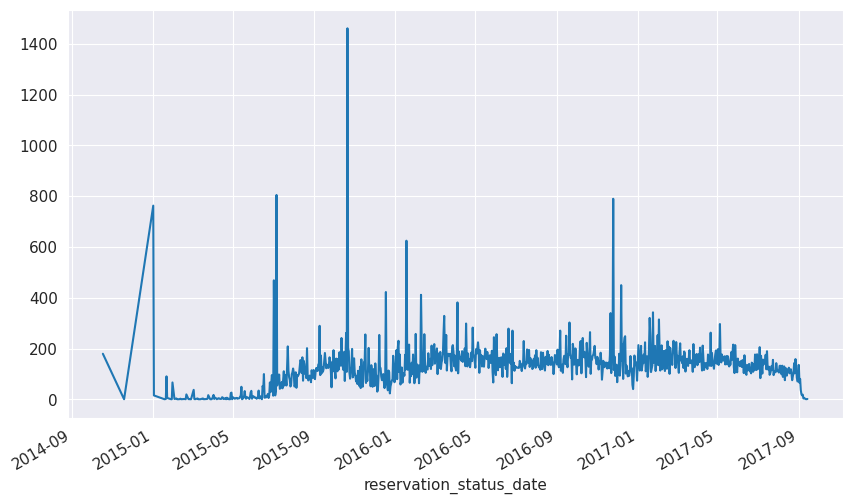

In [21]:
#Visualize daily reservation trends to identify potential peak and low periods.
hotel_data.groupby('reservation_status_date').size().plot();


#5) Revenue Analysis

In [22]:
#Calculates total revenue generated, useful for financial analysis.
total_revenue = (hotel_data['adr'] * hotel_data['total_nights']).sum()

total_revenue


42723497.53

In [23]:
#Average revenue per customer segment helps in identifying high-value segments.
hotel_data.groupby('market_segment')['adr'].mean()


,adr
market_segment,
Aviation,100.142110
Complementary,2.886366
Corporate,69.358952
Direct,115.445175
Groups,79.479472
Offline TA/TO,87.354783
Online TA,117.197063
Undefined,15.000000


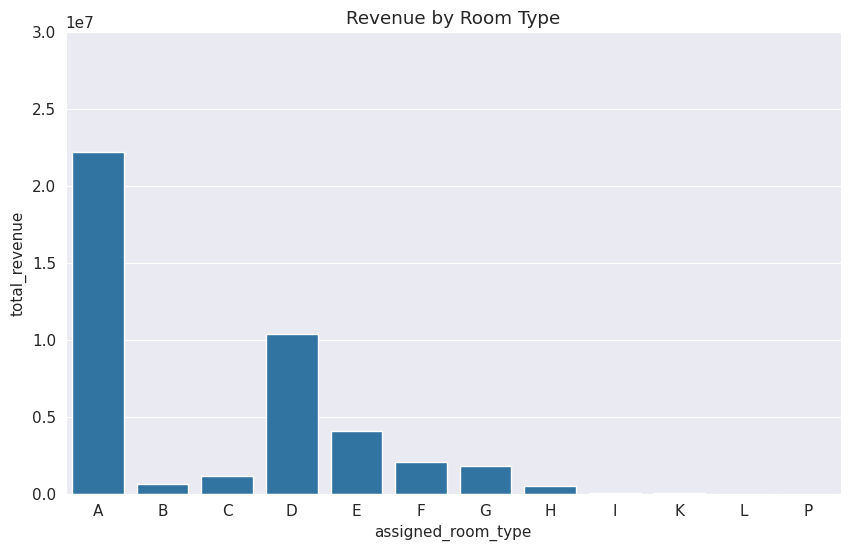

In [49]:
revenue_by_room = hotel_data.groupby('assigned_room_type')['total_revenue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='assigned_room_type', y='total_revenue', data=revenue_by_room)
plt.title('Revenue by Room Type')
plt.ylim(0, 3e7)
plt.show()

#6) Special Request and Customer Preferences


In [24]:
#Understand demand for specific amenities, aiding in customer service improvements.

hotel_data['total_of_special_requests'].value_counts()


,count
total_of_special_requests,
0,70318
1,33226
2,12969
3,2497
4,340
5,40


#7) Data Visualization for Insights

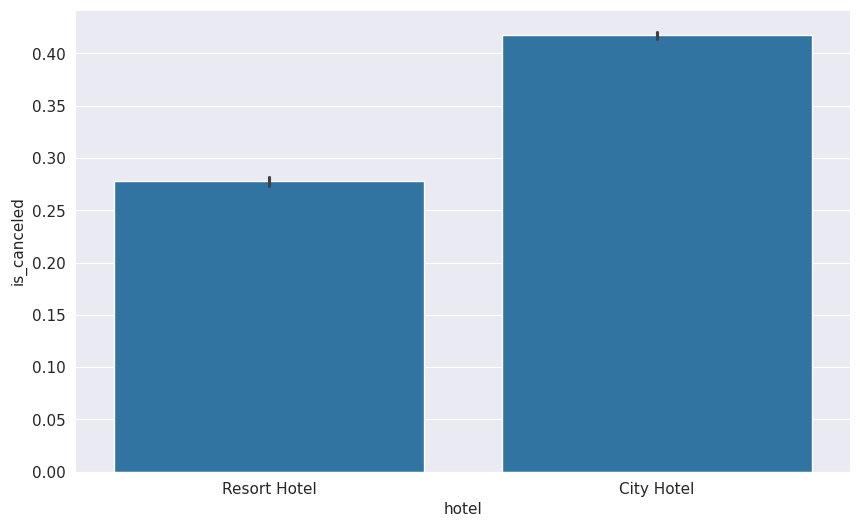

In [25]:
#Cancellation Rate by hotel type

sns.barplot(data=hotel_data, x='hotel', y='is_canceled');


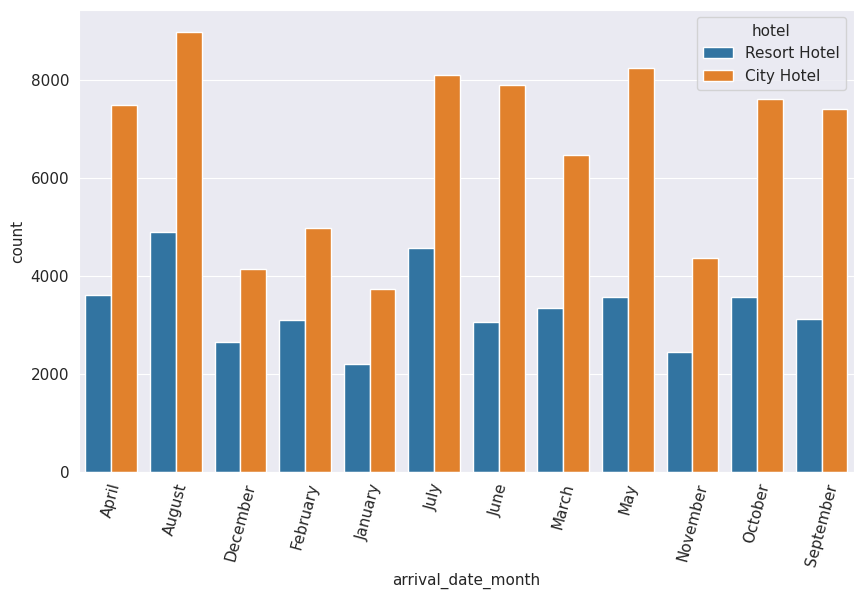

In [26]:
#Booking trends by month

sns.countplot(data=hotel_data, x='arrival_date_month', order=sorted(hotel_data['arrival_date_month'].unique()), hue='hotel');
plt.xticks(rotation=75);

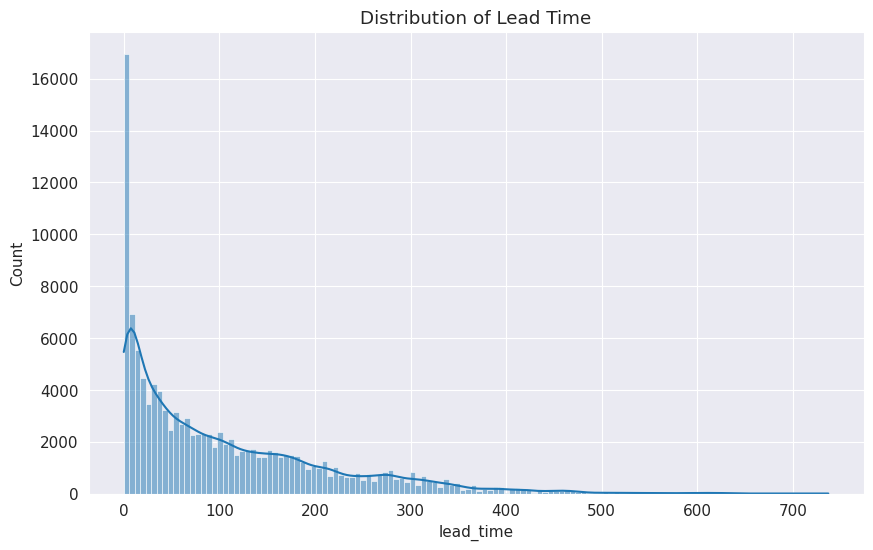

In [27]:
#Lead time distribution

sns.histplot(hotel_data['lead_time'], kde=True)
plt.title('Distribution of Lead Time');

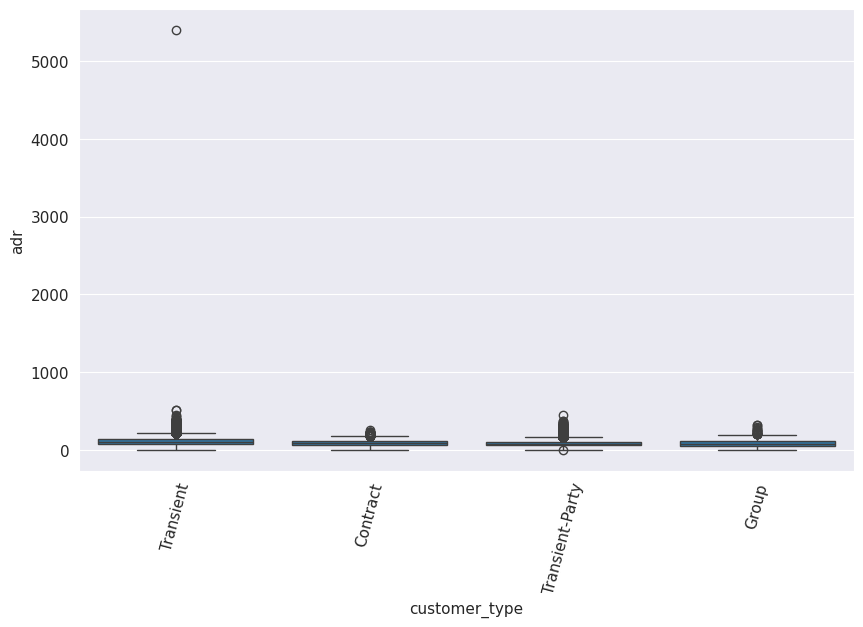

In [28]:
#Daily_rate analysis

sns.boxplot(data=hotel_data, x='customer_type', y='adr')
plt.xticks(rotation=75);

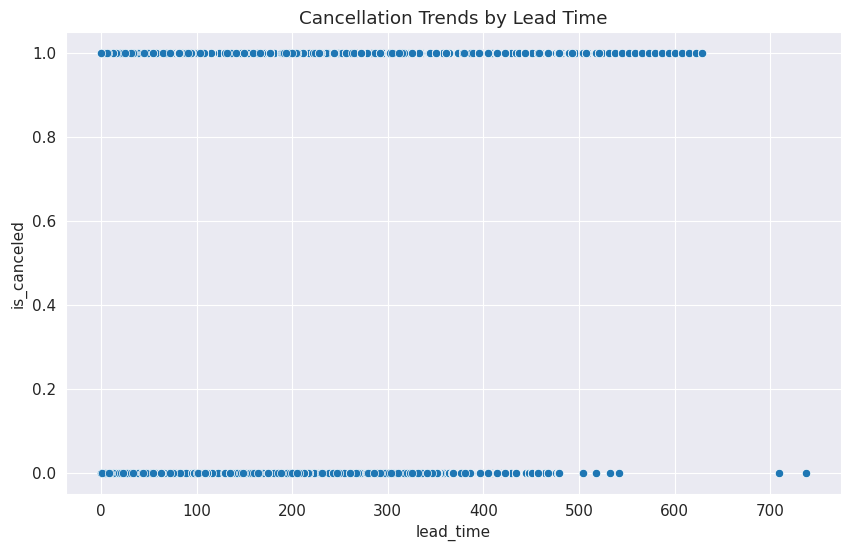

In [29]:
#Cancellation Trends by Lead Time


sns.scatterplot(data=hotel_data, x='lead_time', y='is_canceled')
plt.title('Cancellation Trends by Lead Time');


<Axes: xlabel='arrival_date_month', ylabel='adr'>

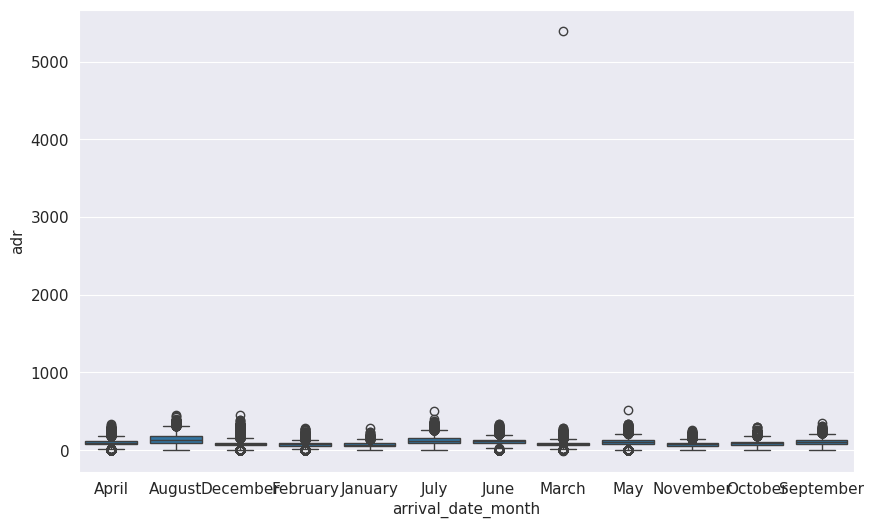

In [30]:
# Daily Rate by Booking Month

sns.boxplot(data=hotel_data, x='arrival_date_month', y='adr', order=sorted(hotel_data['arrival_date_month'].unique()))


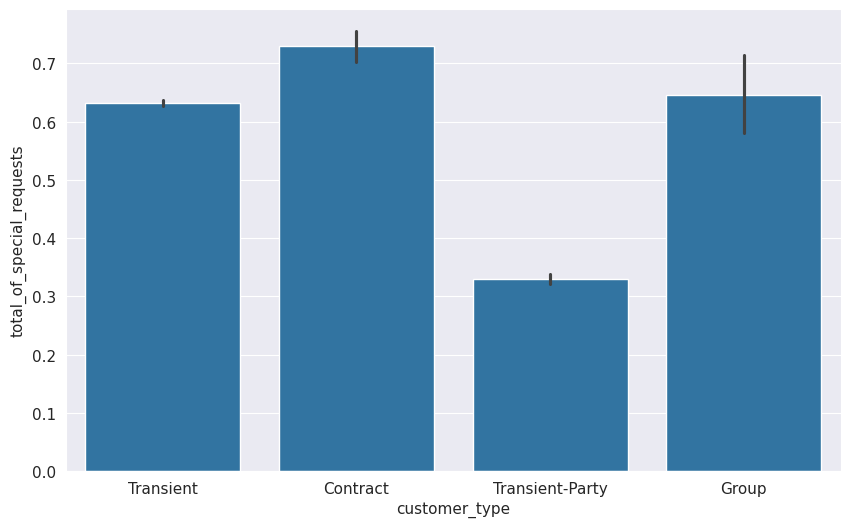

In [31]:
#Special Requests by Customer Type
sns.barplot(data=hotel_data, x='customer_type', y='total_of_special_requests', estimator='mean');


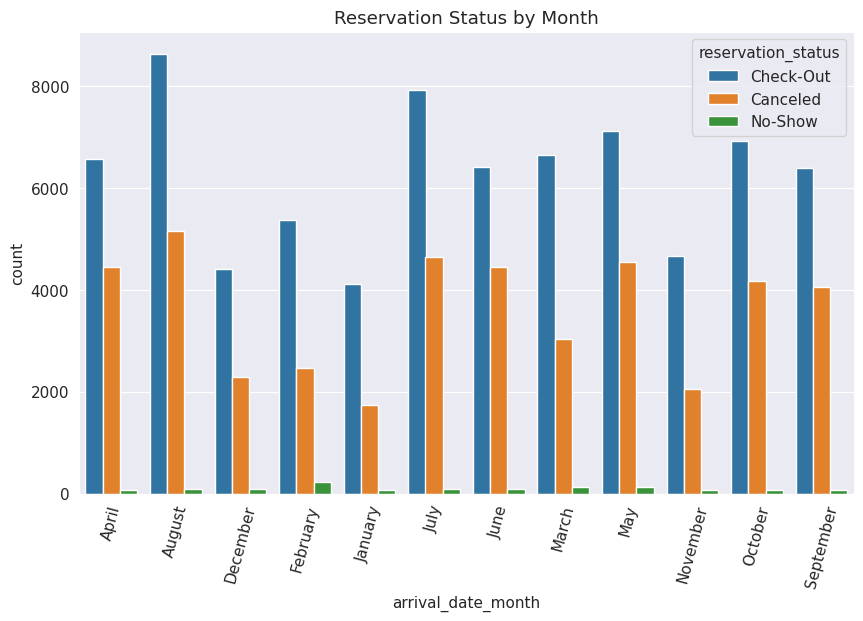

In [32]:
#Reservation by Month

sns.countplot(data=hotel_data, x='arrival_date_month', hue='reservation_status', order=sorted(hotel_data['arrival_date_month'].unique()));
plt.xticks(rotation=75);
plt.title('Reservation Status by Month');


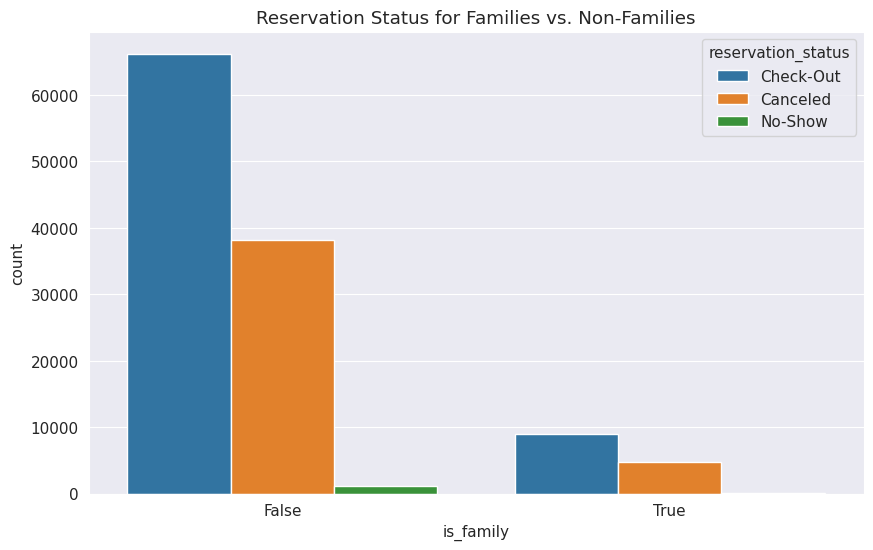

In [33]:
#Distribution of Stays for Families vs. Non-Families

sns.countplot(data=hotel_data, x='is_family', hue='reservation_status');
plt.title('Reservation Status for Families vs. Non-Families');


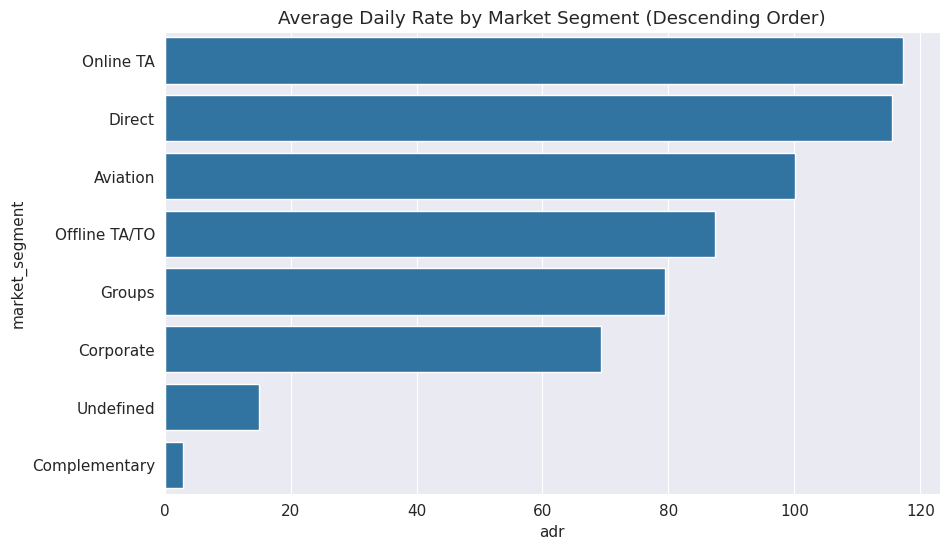

In [40]:
#Average Daily Rate by Market Segment

# Sort the data by 'adr' (Average Daily Rate) in descending order
sorted_data = hotel_data.groupby('market_segment')['adr'].mean().sort_values(ascending=False).reset_index()

# Plot the sorted barplot
sns.barplot(data=sorted_data, x='adr', y='market_segment', estimator='mean')
plt.title('Average Daily Rate by Market Segment (Descending Order)')
plt.show()


<Axes: >

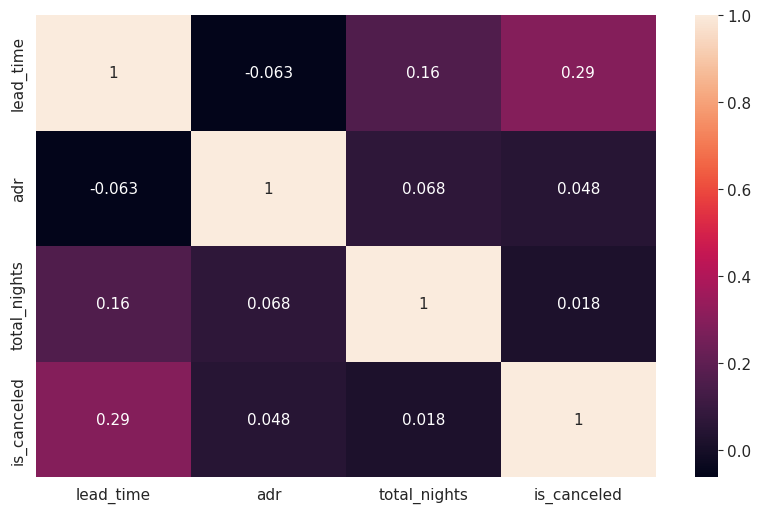

In [34]:
#Correlation Heatmap of Key Variables

sns.heatmap(hotel_data[['lead_time', 'adr', 'total_nights', 'is_canceled']].corr(), annot=True)


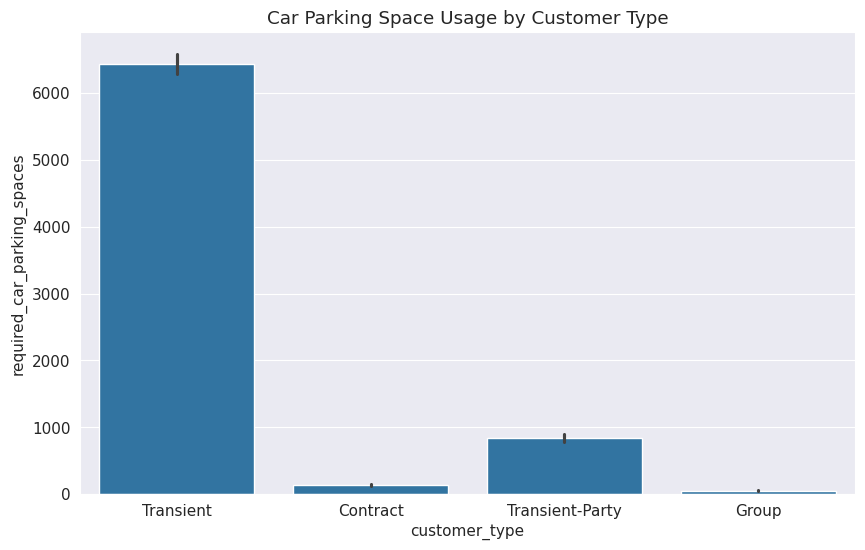

In [35]:
#Car Parking Space Usage by Customer Type

sns.barplot(data=hotel_data, x='customer_type', y='required_car_parking_spaces', estimator='sum')
plt.title('Car Parking Space Usage by Customer Type');

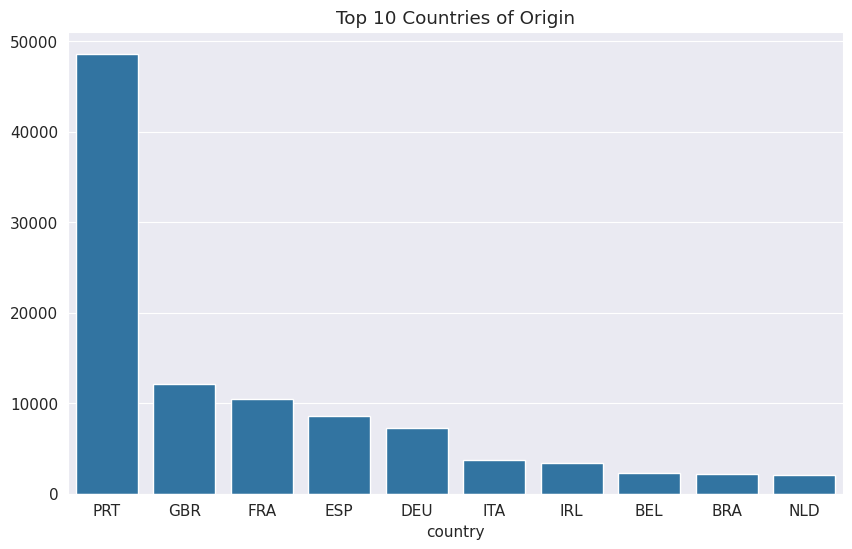

In [36]:
#Top 10 Countries of Origin

top_countries = hotel_data['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values);
plt.title('Top 10 Countries of Origin');
